In [7]:
import pandas as pd
import numpy as np
import sklearn.preprocessing

In [8]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)
    return lower_bound, upper_bound

In [9]:
lemons = pd.read_csv('lemonade.csv')

In [10]:
lemons

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [19]:
# Do these lower outliers make sense? Which outliers should be kept?
# Lower outliers for temperature make sense, all should be kept

lower, upper = get_lower_and_upper_bounds(lemons.Temperature)
lemons[lemons['Temperature'] < lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [16]:
# I would expect at least a couple days where there was no rainfall which is odd, but is possible, all can be kept
# though I would question the validity of this column

lower, upper = get_lower_and_upper_bounds(lemons.Rainfall)
lemons[lemons['Rainfall'] < lower]

In [33]:
# Price always the same

lemons.Price.describe()

count    365.0
mean       0.5
std        0.0
min        0.5
25%        0.5
50%        0.5
75%        0.5
max        0.5
Name: Price, dtype: float64

In [22]:
# No outliers in sales

lower, upper = get_lower_and_upper_bounds(lemons.Sales)
lemons[lemons['Sales'] < lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [27]:
# Do these upper outliers make sense? Which outliers should be kept?
# No this does not make sense, I do not believe it is boiling outside

lower, upper = get_lower_and_upper_bounds(lemons.Temperature)
lemons[lemons['Temperature'] > upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [28]:
# They serving lemonade in the amazon? Rain amounts make sense for this data set

lower, upper = get_lower_and_upper_bounds(lemons.Rainfall)
lemons[lemons['Rainfall'] > upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [30]:
# These sales seem like extreme outliers, I would take them out or inquire as to what happened on these days

lower, upper = get_lower_and_upper_bounds(lemons.Sales)
lemons[lemons['Sales'] > upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [32]:
# Do these lower outliers make sense? Which outliers should be kept?
# No 3* IQR outliers

lower, upper = get_lower_and_upper_bounds(lemons.Temperature, multiplier = 3)
lemons[lemons['Temperature'] < lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [34]:
# None

lower, upper = get_lower_and_upper_bounds(lemons.Rainfall, multiplier = 3)
lemons[lemons['Rainfall'] < lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [35]:
# None

lower, upper = get_lower_and_upper_bounds(lemons.Sales, multiplier = 3)
lemons[lemons['Sales'] < lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [36]:
# There's that boiling one again

lower, upper = get_lower_and_upper_bounds(lemons.Temperature, multiplier = 3)
lemons[lemons['Temperature'] > upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [39]:
# That's a good amount of rain but not impossible by any means, depending on the units here (assuming inches)

lower, upper = get_lower_and_upper_bounds(lemons.Rainfall, multiplier = 3)
lemons[lemons['Rainfall'] > upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [41]:
# These sales seem like extreme outliers, I would take them out or inquire as to what happened on these days\

lower, upper = get_lower_and_upper_bounds(lemons.Sales, multiplier = 3)
lemons[lemons['Sales'] > upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


(<AxesSubplot:>,
 count    365.000000
 mean      61.224658
 std       18.085892
 min       15.100000
 25%       49.700000
 50%       61.100000
 75%       71.700000
 max      212.000000
 Name: Temperature, dtype: float64)

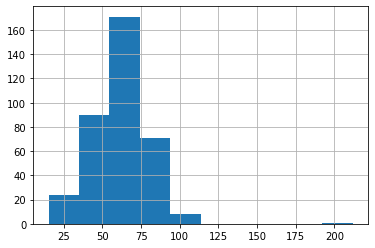

In [51]:
# Identify if any columns in lemonade.csv are normally distributed.
# Temperature appears to be

lemons.Temperature.hist(), lemons.Temperature.describe()

In [48]:
# Use a 2 sigma decision rule to isolate the outliers. Do these make sense? 
# Should certain outliers be kept or removed?
# All make sense with the exception of 212 degrees, I would remove that point

two_sig_up = 61.2 + (2 * 18.1)
two_sig_down = 61.2 - (2 * 18.1)
pd.concat([lemons[lemons['Temperature'] > two_sig_up], lemons[lemons['Temperature'] < two_sig_down]])

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


(<AxesSubplot:>,
 count    365.000000
 mean       0.825973
 std        0.273890
 min        0.400000
 25%        0.650000
 50%        0.740000
 75%        0.910000
 max        2.500000
 Name: Rainfall, dtype: float64)

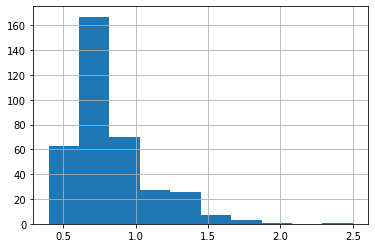

In [50]:
# Rainfall looks relatively normal but skews to the right for sure

lemons.Rainfall.hist(), lemons.Rainfall.describe()

In [52]:
# Use a 2 sigma decision rule to isolate the outliers. Do these make sense? 
# Should certain outliers be kept or removed?
# These outliers don't strike me as outrageous, I would keep them

two_sig_up = .826 + (2 * .274)
two_sig_down = .826 - (2 * .274)
pd.concat([lemons[lemons['Rainfall'] > two_sig_up], lemons[lemons['Rainfall'] < two_sig_down]])

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
19,1/20/17,Friday,31.6,1.43,20,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


(<AxesSubplot:>,
 count    365.000000
 mean      27.865753
 std       30.948132
 min        7.000000
 25%       20.000000
 50%       25.000000
 75%       30.000000
 max      534.000000
 Name: Sales, dtype: float64,
 <AxesSubplot:>)

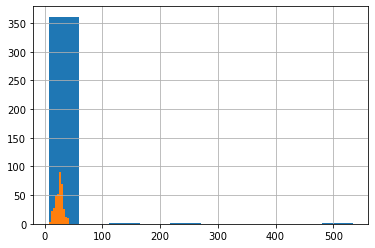

In [55]:
# We can see with outliers removed the distribution is pretty normal

lemons.Sales.hist(), lemons.Sales.describe(), lemons[lemons['Sales'] < 100].Sales.hist()

In [56]:
# Use a 2 sigma decision rule to isolate the outliers. Do these make sense? 
# Should certain outliers be kept or removed?
# These outliers don't strike me as outrageous, I would keep them

two_sig_up = 27.9 + (2 * 30.9)
two_sig_down = 27.9 - (2 * 30.9)
pd.concat([lemons[lemons['Sales'] > two_sig_up], lemons[lemons['Sales'] < two_sig_down]])

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
